In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
%matplotlib inline
import re
import warnings

In [2]:
#Notes/idead/thoughts

# success rate of gpu's
# what does job termination mean - lose work? means that calculating time is important
#requested jobs used time and terminated -why a buffer
#......................................................
#failures by user - who and not completeing - using a lot of resources 
#failed jobs - bad users or hardware failure (exitcode)
#envoriment side  -- first value user - exitcode, second environment 

#'0:9 and 0:15 are the most common exit codes for jobs with some version of the state of "CANCELLED"

#asking for enough memory/types of failures
#asking too much memory

In [291]:
warnings.filterwarnings(action='ignore', category= FutureWarning)

In [292]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
#accre

In [293]:
accre = pd.DataFrame(accre)
#accre

In [294]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
#accre

In [295]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit = 'S')
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit = 'S')
accre = accre[accre['USEDMEM'].map(len) > 1]
#accre

In [296]:
accre_glasshouse = accre[accre['ACCOUNT'] == 'glasshouse']
accre_virginia = accre[accre['ACCOUNT'] == 'virginia']
accre_malanga = accre[accre['ACCOUNT'] == 'malanga']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_prince = accre[accre['ACCOUNT'] == 'prince']
accre_grisette = accre[accre['ACCOUNT'] == 'grisette']
accre_harovin = accre[accre['ACCOUNT'] == 'harovin']
accre_antares = accre[accre['ACCOUNT'] == 'antares']
accre_sunburst = accre[accre['ACCOUNT'] == 'sunburst']
accre_pasilla = accre[accre['ACCOUNT'] == 'pasilla']
accre_plumcot = accre[accre['ACCOUNT'] == 'plumcot']
accre_pecans = accre[accre['ACCOUNT'] == 'pecans']
accre_kinnow = accre[accre['ACCOUNT'] == 'kinnow']
accre_bertanne = accre[accre['ACCOUNT'] == 'bertanne']
accre_almonds = accre[accre['ACCOUNT'] == 'almonds']
accre_apple = accre[accre['ACCOUNT'] == 'apple']
accre_cactus = accre[accre['ACCOUNT'] == 'cactus']

In [297]:
accre_glasshouse_failed_count = accre_glasshouse[accre_glasshouse['STATE'] == 'FAILED']
#accre_glasshouse_failed_count.info()
accre_glasshouse_fail_pct = 250/234998


In [298]:
accre_virginia_failed_count = accre_virginia[accre_virginia['STATE'] == 'FAILED']
#accre_virginia_failed_count.info()
accre_virginia_fail_pct = 0/9488

In [299]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [300]:
accre_prince_failed_count = accre_prince[accre_prince['STATE'] == 'FAILED']
#accre_prince_failed_count
accre_prince_fail_pct = 0/7174

In [301]:
accre_malanga_failed_count = accre_malanga[accre_malanga['STATE'] == 'FAILED']
#accre_malanga_failed_count.info()
accre_malanga_fail_pct = 0/8157

In [302]:
accre_grisette_failed_count = accre_grisette[accre_grisette['STATE'] == 'FAILED']
#accre_grisette_failed_count.info()
accre_grisette_fail_pct = 1/5242

In [303]:
accre_harovin_failed_count = accre_harovin[accre_harovin['STATE'] == 'FAILED']
#accre_harovin_failed_count.info()
accre_harovin_fail_pct = 4/4534

In [304]:
accre_antares_failed_count = accre_antares[accre_antares['STATE'] == 'FAILED']
#accre_antares_failed_count.info()
accre_antares_fail_pct = 0/3015

In [305]:
accre_sunburst_failed_count = accre_sunburst[accre_sunburst['STATE'] == 'FAILED']
#accre_sunburst_failed_count.info()
accre_sunburst_fail_pct = 87/1505

In [306]:
accre_pasilla_failed_count = accre_pasilla[accre_pasilla['STATE'] == 'FAILED']
#accre_pasilla_failed_count.info()
accre_pasilla_fail_pct = 1/1263

In [307]:
accre_plumcot_failed_count = accre_plumcot[accre_plumcot['STATE'] == 'FAILED']
#accre_plumcot_failed_count.info()
accre_plumcot_fail_pct = 0/790

In [308]:
accre_pecans_failed_count = accre_pecans[accre_pecans['STATE'] == 'FAILED']
#accre_pecans_failed_count.info()
accre_pecans_fail_pct = 0/576

In [309]:
accre_kinnow_failed_count = accre_kinnow[accre_kinnow['STATE'] == 'FAILED']
#accre_kinnow_failed_count.info()
accre_kinnow_fail_pct = 0/406

In [310]:
accre_bertanne_failed_count = accre_bertanne[accre_bertanne['STATE'] == 'FAILED']
#accre_bertanne_failed_count.info()
accre_bertanne_fail_pct = 1/198

In [311]:
accre_almonds_failed_count = accre_almonds[accre_almonds['STATE'] == 'FAILED']
#accre_almonds_failed_count.info()
accre_almonds_fail_pct = 6/197

In [312]:
accre_apple_failed_count = accre_apple[accre_apple['STATE'] == 'FAILED']
#accre_apple_failed_count.info()
accre_apple_fail_pct = 11/186

In [313]:
accre_cactus_failed_count = accre_cactus[accre_cactus['STATE'] == 'FAILED']
#accre_cactus_failed_count.info()
accre_cactus_fail_pct = 0/113

In [314]:
accre_account_fail_pct = pd.DataFrame({'ACCOUNT': ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'],
              
              'PERCENT_FAIL': [accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]})

<AxesSubplot:title={'center':'Failed Percentages for Accounts with 100+ Jobs'}, ylabel='ACCOUNT'>

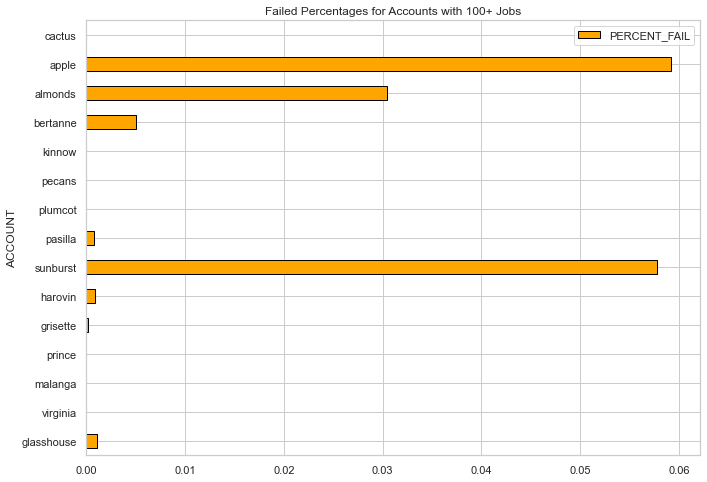

In [315]:
#accre_account_fail_pct                            #This is the fail percent for all jobs for Accounts with over 100 jobs#


accre_account_fail_pct.set_index('ACCOUNT').plot(
    kind = 'barh', color = 'orange', edgecolor = 'black', figsize=(11,8), title = 'Failed Percentages for Accounts with 100+ Jobs') #***Change to multicolor bars****#

In [356]:
#accre['USEDMEM'] = accre['USEDMEM'].astype(float)
#accre['USEDMEM'].info()

In [336]:
#accre_apple[['USEDMEM', 'REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_apple_time_diff = accre_apple['REQTIME'] - accre_apple['USEDTIME']
#accre_apple_time_diff.describe()
#accre_apple['USEDMEM'].astype(float).describe()
#accre_apple['USEDMEM'].info()

Apple:
    
    Total Jobs: 186
    Failed: 11 (6%) 
    Completed: 44 (26%)
    Cancelled: 116 (62%) 
    Cancelled by 50355: 11 (6%) 
    Cancelled by 161909: 4 (2%)

Partition:
    
    Turing: 185 (99%)
    Maxwell: 1 (1%)
        
Used Memory:
    
    Total Use: 2.9 KB
    Average: 5649.704785
        

ReqTime/UsedTime:
    
    Avg ReqTime: 3 days 18:58:23.225806451
    Avg UsedTime:  2 days 05:42:41.741935483
    Average Diff:  1 days 13:15:41.483870967

    


In [346]:
#accre_sunburst[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_sunburst_time_diff = accre_sunburst['REQTIME'] - accre_sunburst['USEDTIME']
#accre_sunburst_time_diff.describe()
#accre_sunburst['USEDMEM'].astype(float).describe()
#accre_sunburst['USEDTIME'].describe()

Sunburst:
    
    Total Jobs: 1505, 
    Failed: 87 (6%) 
    Completed: 1388 (92%) 
    Cancelled: 12 (1%) 
    Cancelled by 649321: 11 (1%) 
    Cancelled by 0: 4 (002%)
        
Partition:
    
    Pascal: 1505 (100%)

       
Used Memory:
    
    Total Use: 23.5+ KB
    Average:  250.918525
        

ReqTime/UsedTime:
    
    Avg ReqTime:  3 days 23:48:50.232558139
    Avg UsedTime:  0 days 02:01:03.124916943
    Average Diff:  3 days 21:47:47.107641196

In [354]:
#accre_almonds[['REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()
#accre_almonds_time_diff = accre_almonds['REQTIME'] - accre_almonds['USEDTIME']
#accre_almonds_time_diff.describe()
#accre_almonds['USEDMEM'].astype(float).describe()
#accre_almonds['USEDTIME'].describe()

Almonds:

    Total Jobs: 197
    Failed: 6 (3%) 
    Completed: 184 (93%) 
    Cancelled: 7 (4%) 
    Cancelled by : 0 (0%) 
    Cancelled by : 0 (0%)
    
Partition:
    
    turing: 197 (100%)


Used Memory:
    
    Total Use:  3.1+ KB
    Average:  6726.124619
        

ReqTime/UsedTime:
    
    Avg ReqTime:    1 days 21:06:51.167512690
    Avg UsedTime:   0 days 03:19:40.614213197
    Average Diff:   1 days 17:47:10.553299492

In [355]:
#accre_almonds[['USEDMEM','REQTIME', 'USEDTIME', 'STATE', 'EXITCODE']].value_counts()

In [ ]:
#Looking at Accounts Failed rate and who's fault#/distribution/Users from accounts-is there a individual who is failing/
#By what percent are they off/Do users get better with jobs-corr?   ** timeseries plot ***

In [ ]:
#This makes a horizontal dataframe#

In [120]:
accre_account_fail_pct = pd.DataFrame([[ accre_glasshouse_fail_pct, accre_virginia_fail_pct, accre_malanga_fail_pct,
               accre_prince_fail_pct, accre_grisette_fail_pct, accre_harovin_fail_pct,
               accre_sunburst_fail_pct, accre_pasilla_fail_pct, accre_plumcot_fail_pct,
               accre_pecans_fail_pct, accre_kinnow_fail_pct, accre_bertanne_fail_pct,
               accre_almonds_fail_pct, accre_apple_fail_pct, accre_cactus_fail_pct]],
             
    columns = ['glasshouse', 'virginia', 'malanga',
              'prince', 'grisette', 'harovin',
              'sunburst', 'pasilla', 'plumcot',
              'pecans', 'kinnow', 'bertanne',
              'almonds', 'apple', 'cactus'])

In [ ]:
# .squeeze() converts df to series
#accre_list = pd.DataFrame(accre, columns=['USEDMEM'])
#accre_list = accre_list.squeeze()
